ALL PASSENGER RATED COL
Inflight wifi service: 2.72968316907915
Departure/Arrival time convenient: 3.06029604250077
Ease of Online booking: 2.7569006005543577
Gate location: 2.9768825069294733
Food and drink: 3.2021288882044963
Online boarding: 3.250375346473668
Seat comfort: 3.4393959809054513
Inflight entertainment: 3.358157530027718
On-board service: 3.382362565445026
Leg room service: 3.3510548198336925
Baggage handling: 3.6318332306744687
Checkin service: 3.304290498922082
Inflight service: 3.6404277024946103
Cleanliness: 3.2863508623344626
Inflight wifi service: 2.72968316907915
Food and drink: 3.2021288882044963
Seat comfort: 3.4393959809054513
Inflight entertainment: 3.358157530027718
On-board service: 3.382362565445026
Leg room service: 3.3510548198336925
Inflight service: 3.6404277024946103
Cleanliness: 3.2863508623344626
0.43333269171542965
Inflight wifi service >> 0.35
Departure/Arrival time convenient >> -0.05
Ease of Online booking >> 0.22
Gate location >> 0.04
Food and d

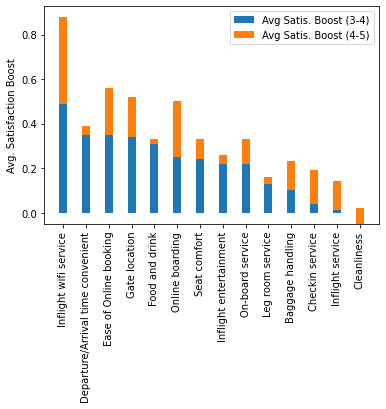

KeyboardInterrupt: ignored

In [119]:
# ------------------------------------------------------------------
#LINK TO MY BLOG https://asarkisian99.medium.com/attaining-top-flight-customer-satisfaction-in-the-airline-industry-82194057f578
# ------------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

frame = pd.read_csv("train.csv")

# All 14 ranked categories
passRatings = ["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding",
               "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service",
               "Inflight service", "Cleanliness"]

# Categories that can be addressed by investing in in-fight services
inFlight = ["Inflight wifi service", "Food and drink", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", 
            "Inflight service", "Cleanliness"]

# Categories that can be addressed by investing in mobile app
app = ["Ease of Online booking", "Online boarding", "Inflight entertainment", "Checkin service"]

# Categories that can be addressed by investing in plane infrastructure
plane = ["Inflight wifi service", "Seat comfort", "Leg room service"]

# List used for analyzing satisfaction boost by category
threeFour = ["Inflight wifi service_3",	"Inflight wifi service_4",	
             "Departure/Arrival time convenient_3",	"Departure/Arrival time convenient_4",	
             "Ease of Online booking_3",	"Ease of Online booking_4",	"Gate location_3",	
             "Gate location_4",	"Food and drink_3",	"Food and drink_4",	"Online boarding_3",	
             "Online boarding_4",	"Seat comfort_3",	"Seat comfort_4",	"Inflight entertainment_3",
             "Inflight entertainment_4",	"On-board service_3",	"On-board service_4",	"Leg room service_3",	
             "Leg room service_4",	"Baggage handling_3",	"Baggage handling_4",	"Checkin service_3",	
             "Checkin service_4",	"Inflight service_3",	"Inflight service_4",	"Cleanliness_3",	"Cleanliness_4"]

# List used for analyzing satisfaction boost by category
fourFive = ["Inflight wifi service_5",	"Inflight wifi service_4",	
             "Departure/Arrival time convenient_5",	"Departure/Arrival time convenient_4",	
             "Ease of Online booking_5",	"Ease of Online booking_4",	"Gate location_5",	
             "Gate location_4",	"Food and drink_5",	"Food and drink_4",	"Online boarding_5",	
             "Online boarding_4",	"Seat comfort_5",	"Seat comfort_4",	"Inflight entertainment_5",
             "Inflight entertainment_4",	"On-board service_5",	"On-board service_4",	"Leg room service_5",	
             "Leg room service_4",	"Baggage handling_5",	"Baggage handling_4",	"Checkin service_5",	
             "Checkin service_4",	"Inflight service_5",	"Inflight service_4",	"Cleanliness_5",	"Cleanliness_4"]
  
# ADD BINARY SATISFIED COLUMN
frame.loc[frame["satisfaction"] == "satisfied", "satisfaction_binary"] = 1
frame.loc[frame["satisfaction"] == "neutral or dissatisfied", "satisfaction_binary"] = 0


# ADD DUMMY VARIABLE FOR CLASS
# ECO = 1, ECO PLUS = 2, BUSINESS = 3
frame.loc[frame["Class"] == "Eco", "class_num"] = 1
frame.loc[frame["Class"] == "Eco Plus", "class_num"] = 2
frame.loc[frame["Class"] == "Business", "class_num"] = 3


# PRINT ALL PASSRATINGS COL AVGS
print("ALL PASSENGER RATED COL")
for col in frame.columns:
  if col in passRatings:
    print(col + ":", frame[col].mean())


# PRINT ALL INFLIGHT COL AVGS
for col in frame.columns:
  if col in inFlight:
    print(col + ":", frame[col].mean())

print(frame["satisfaction_binary"].mean())



# CORRELATION: INFLIGHT,  AND SATISFACTION

frame.groupby("Class")["satisfaction_binary"].mean()

frame.groupby("Customer Type")["satisfaction_binary"].mean()

# 3 to 4 to 5
for col in frame.columns:
  if col in passRatings:
    threes = col + "_3" # how satisfied were the 3s on avg
    fours = col + "_4" # how satisfied were the 4s on avg
    fives = col + "_5"
    frame.loc[frame[col] == 3, threes] = frame["satisfaction_binary"]
    frame.loc[frame[col] == 4, fours] = frame["satisfaction_binary"]
    frame.loc[frame[col] == 5, fives] = frame["satisfaction_binary"]


threeFourSatisBoost = []
for i in range(0,28,2):
  satisBoost = round((frame[threeFour[i+1]].mean() - frame[threeFour[i]].mean()), 2)
  threeFourSatisBoost.append(satisBoost)

for i in range(0,14):
  print(passRatings[i], ">>", threeFourSatisBoost[i])


# print("- - - - - - - - - - -")
fourFiveSatisBoost = []
for i in range(0,28,2):
  satisBoost = round((frame[fourFive[i]].mean() - frame[fourFive[i+1]].mean()), 2)
  fourFiveSatisBoost.append(satisBoost)

for i in range(0,14):
  print(passRatings[i], ">>", fourFiveSatisBoost[i])

# # THREE - FIVE PLOT

fig, ax = plt.subplots()
width = .35

threeFourSatisBoost.sort(reverse=True)

ax.bar(passRatings, threeFourSatisBoost, width, label = "Avg Satis. Boost (3-4)")
ax.bar(passRatings, fourFiveSatisBoost, width, bottom=threeFourSatisBoost,
       label = "Avg Satis. Boost (4-5)")
plt.xticks(rotation=90) 
ax.legend()
ax.set_ylabel("Avg. Satisfaction Boost")
plt.show()

ages = []
for age in range(7,86):
  if age in frame["Age"]:
    ages.append(age)

for age in ages:
  fAge = str(age) + "F"
  mAge = str(age) + "M"
  frame.loc[(frame["Age"] == age) & (frame["Gender"] == "Female"), fAge] = frame["satisfaction_binary"]
  frame.loc[(frame["Age"] == age) & (frame["Gender"] == "Male"), mAge] = frame["satisfaction_binary"]

ageMeansM = []
ageMeansF = []
for age in range(7, 86):
   ageMeansM.append(frame[str(age) + "M"].mean())
   ageMeansF.append(frame[str(age) + "F"].mean())

plt.plot(ages[7:81], ageMeansM[7:81], label="Avg Male Satis.")
plt.plot(ages[7:81], ageMeansF[7:81], label="Avg Female Satis.", color="red")
plt.legend()
plt.ylabel("Average Satisfaction")
plt.xlabel("Passenger Age")

# COMBINED DELAY
frame["totalDelay"] = frame["Departure Delay in Minutes"] + frame["Arrival Delay in Minutes"]

bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]


for i in range(0, 11):
  binCol = str(bins[i]) + "DelaySatis"
  frame.loc[(frame["totalDelay"] >= bins[i]) & (frame["totalDelay"] < bins[i+1]), binCol] = frame["satisfaction_binary"]


binsMeans = []
for bin in range(0,330, 30):
  binsMeans.append(frame[str(bin) + "DelaySatis"].mean())
  
plt.plot(bins[0:11], binsMeans)
plt.ylabel("Average Satisfaction")
plt.xlabel("Delay in Minutes")

# INDIVIDUAL DELAY
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]


for i in range(0, 11):
  binColA = str(bins[i]) + "DelayASatis"
  frame.loc[(frame["Arrival Delay in Minutes"] >= bins[i]) & (frame["Arrival Delay in Minutes"] < bins[i+1]), binColA] = frame["satisfaction_binary"]

for i in range(0, 11):
  binColD = str(bins[i]) + "DelayDSatis"
  frame.loc[(frame["Departure Delay in Minutes"] >= bins[i]) & (frame["Departure Delay in Minutes"] < bins[i+1]), binColD] = frame["satisfaction_binary"]

binsMeansA = []
for bin in range(0,330, 30):
  binsMeansA.append(frame[str(bin) + "DelayASatis"].mean())

binsMeansD = []
for bin in range(0,330, 30):
  binsMeansD.append(frame[str(bin) + "DelayDSatis"].mean())
  
plt.plot(bins[0:11], binsMeansA, label = "Arrival")
plt.plot(bins[0:11], binsMeansD, label = "Departure")
plt.ylabel("Average Satisfaction")
plt.xlabel("Delay in Minutes")
plt.legend()

binsDis = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

for i in range(0, 11):
  binCols = str(binsDis[i]) + "DistSatis"
  frame.loc[(frame["Flight Distance"] >= bins[i]) & (frame["Flight Distance"] < bins[i+1]), binCols] = frame["satisfaction_binary"]


binMeans = []
for bin in range(0,5500, 500):
  binMeans.append(frame[str(bin) + "DistSatis"].mean())

plt.plot(binsDis[0:11], binMeans)
plt.ylabel("Average Satisfaction")
plt.xlabel("Flight Distance (miles)")

# CORRELATION: PASSRATINGS AND SATISFACTION
correl = []
# print("CORRELATION: PASSRATINGS AND SATISFACTION")
for col in frame.columns:
  if col in passRatings:
    # print(col + ": " , frame["satisfaction_binary"].corr(frame[col]).round(3))
    correl.append(frame["satisfaction_binary"].corr(frame[col]).round(3))

correl.sort(reverse=True)
plt.bar(passRatings, correl)
plt.xticks(rotation=90) 
plt.ylabel("Correlation Coefficient")


disloyal = [14.8, 23.3, 4.5]
loyal = [85.2, 86.7, 90.5]
classes = ["Business", "Economy Plus", "Economy"]



plt.bar(classes, loyal, label = "Loyal")
plt.bar(classes, disloyal, label = "Not Loyal")
plt.legend()
plt.ylabel("% of Class by Loyalty")



